# Dataset Description

In this competition, you will predict sales for the thousands of product families sold at Favorita stores located in Ecuador. The training data includes dates, store and product information, whether that item was being promoted, as well as the sales numbers. Additional files include supplementary information that may be useful in building your models.

# File Descriptions and Data Field Information

**1.train.csv**
* The training data, comprising time series of features **store_nbr, family, and onpromotion as well as the target sales.**
1. **store_nbr** identifies the store at which the products are sold.
2. **family** identifies the type of product sold.
3. **sales** gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
4. **onpromotion** gives the total number of items in a product family that were being promoted at a store at a given date.

**2. test.csv**

1. The test data, having the same features as the training data. You will predict the **target sales** for the dates in this file.
2. The dates in the test data are for the 15 days after the last date in the training data.

**3. sample_submission.csv**

1. A sample submission file in the correct format.

**4. stores.csv**

1. Store metadata, including **city, state, type, and cluster**.
2. **cluster** is a grouping of similar stores.

**5. oil.csv**

1. **Daily oil price**. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

**6. holidays_events.csv**

1. Holidays and Events, with metadata
2. NOTE: Pay special attention to the **transferred** column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
3. Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).


**Additional Notes**
Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore' )
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=18
%matplotlib inline
#Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns", None)


In [2]:
# reading different dataframe using pandas 
holiday_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\holidays_events.csv")
oil_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\oil.csv")
store_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\stores.csv")
train_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\train.csv")
test_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\test.csv")
transcation_df = pd.read_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\transactions.csv")

In [3]:
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
print(f"Total number of Rows = {train_df.shape[0]} and Columns = {train_df.shape[1]}")

Total number of Rows = 3000888 and Columns = 6


In [8]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
transcation_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
# mereging all dataframe into 1 dataframe
df_train = train_df.merge(holiday_df, on = 'date', how='left') # merging on data column of train data by left join
df_train = df_train.merge(oil_df, on = 'date', how='left') # merging on data column of train data by left join
df_train = df_train.merge(store_df, on = 'store_nbr', how='left') # merging on store_nbr column of train data by left join
df_train = df_train.merge(transcation_df, on = ['date', 'store_nbr'], how='left') # merging on data and Store_nbr column of train data by left join
df_train = df_train.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"}) # replace columns names

In [11]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [12]:
df_train.to_csv(r"C:\Users\Sumeet Maheshwari\Desktop\end to end project\Store sales Forcasting\Store_Sales_Forcasting-\Dataset\final.csv")

In [13]:
# Converting The data column into different data
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()


In [14]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


In [15]:
print(f"Total number of Rows = {df_train.shape[0]} and Columns = {df_train.shape[1]}")

Total number of Rows = 3054348 and Columns = 22


In [16]:
# basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  year          int64         
 18  month         int64         
 19  week          UInt32        
 20  quarter       int64         
 21  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int64(7), object(10)


In [17]:
# creating dataframe which contain variable , data types of columns, count of values, no of uniques values, no of missinig values
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df_train.columns:
    variables.append(item)
    dtypes.append(df_train[item].dtype)
    count.append(len(df_train[item]))
    unique.append(len(df_train[item].unique()))
    missing.append(df_train[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    
output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,id,int64,3054348,3000888,0
1,date,datetime64[ns],3054348,1684,0
2,store_nbr,int64,3054348,54,0
3,family,object,3054348,33,0
4,sales,float64,3054348,379610,0
5,onpromotion,int64,3054348,362,0
6,holiday_type,object,3054348,7,2551824
7,locale,object,3054348,4,2551824
8,locale_name,object,3054348,25,2551824
9,description,object,3054348,102,2551824


In [18]:
# checking duplicated values
df_train.duplicated().sum()

0

In [19]:
# basis description
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3054348.0,1.504277e+06,866261.012008,0.00,754676.75,1507571.50,2255120.250,3000887.00
store_nbr,3054348.0,2.750000e+01,15.585787,1.00,14.00,27.50,41.000,54.00
sales,3054348.0,3.590209e+02,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480e+00,12.254939,0.00,0.00,0.00,0.000,741.00
dcoilwtico,2099196.0,6.801587e+01,25.691342,26.19,46.41,53.43,95.810,110.62
cluster,3054348.0,8.481481e+00,4.649735,1.00,4.00,8.50,13.000,17.00
transactions,2805231.0,1.697071e+03,966.831652,5.00,1046.00,1395.00,2081.000,8359.00
year,3054348.0,2.014842e+03,1.345607,2013.00,2014.00,2015.00,2016.000,2017.00
month,3054348.0,6.222870e+00,3.374251,1.00,3.00,6.00,9.000,12.00
week,3054348.0,2.530863e+01,14.750509,1.00,13.00,25.00,38.000,53.00


In [20]:
# checking unique values
df_train.nunique()

id              3000888
date               1684
store_nbr            54
family               33
sales            379610
onpromotion         362
holiday_type          6
locale                3
locale_name          24
description         101
transferred           2
dcoilwtico          994
city                 22
state                16
store_type            5
cluster              17
transactions       4993
year                  5
month                12
week                 53
quarter               4
day_of_week           7
dtype: int64

# Handing Null values

In [21]:
# Checking null values
df_train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
year                  0
month                 0
week                  0
quarter               0
day_of_week           0
dtype: int64

In [22]:
# Checking null values in percentage
df_train.isnull().mean() *100

id               0.000000
date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
holiday_type    83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
dcoilwtico      31.271879
city             0.000000
state            0.000000
store_type       0.000000
cluster          0.000000
transactions     8.156143
year             0.000000
month            0.000000
week             0.000000
quarter          0.000000
day_of_week      0.000000
dtype: float64

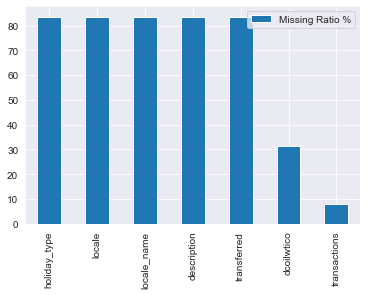

<Figure size 720x432 with 0 Axes>

In [23]:
# Created a function which plot null values
# created a function which will display columns names of having null values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.figure(figsize=(10,6))
        plt.show()
        
    else:
        print('No NAs found')

plot_nas(df_train)

**Observation**
1. holiday_type, locale, locale_name, description having same no of null values which is arround 83.55%
2. dcoilwtico is crud oil price index which is having 31% missing values
3. Transaction has 8.15% missing values
**solution Of Missing Values**
1. columns has missing values greater than 80% going to drop that columns
2. for dcoilwtico going to impute mean values
3. Transaction is imputing mean values. 

In [24]:
# droping null values unwanted columns
df_train.drop(columns=['id'],inplace=True )

In [25]:
# Handling Missing Values of oil price
df_train = df_train.rename(columns={"dcoilwtico": "oil_price"})

In [26]:
df_train['oil_price'].mean()

68.01587436358177

<AxesSubplot:>

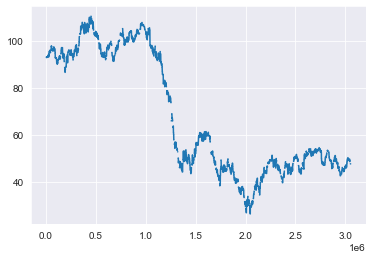

In [27]:
# ploting The oil price values vs date
df_train['oil_price'].plot(kind = "line")

In [28]:
# imputing the null value of mean values
df_train['transactions'] = df_train['transactions'].fillna(df_train['transactions'].mean())


# Handling Missing values for oil price 

    Have a Oil price in dataset with 33% missing values, there are several techniques you can consider for filling in those missing values.

    Given the significant proportion of missing values, simple techniques like forward fill, backward fill, or moving averages may not be the most suitable options as they can potentially introduce biases or distort the underlying trends in the data. Instead, I would recommend considering more advanced techniques such as:

1. Time-series interpolation methods: Since stock price data is often time-dependent, time-series interpolation techniques can be effective. These methods, such as linear interpolation or cubic spline interpolation, estimate missing values based on the relationship between adjacent observed values and the time index.

2. Multiple imputation: Multiple imputation techniques, such as using regression models or predictive mean matching, generate multiple plausible values for each missing data point based on observed values and their relationships. This approach captures the uncertainty associated with the missing values and preserves the variability in the dataset.

3. Machine learning algorithms: You can leverage machine learning algorithms, such as random forests or gradient boosting, to predict missing values based on the available features in your dataset. By training a model on the observed data, you can predict the missing values using the learned relationships.

4. Deep learning models: Advanced deep learning models like recurrent neural networks (RNNs) or long short-term memory (LSTM) networks can capture temporal dependencies in the data and fill in missing values accordingly. These models can learn patterns and trends in the stock price data to provide accurate imputations.

        When selecting a technique, it's crucial to consider the characteristics of your dataset, the nature of the missing values, and the specific goals of your analysis. Additionally, evaluating the imputation results and assessing the impact of missing value imputation on subsequent analyses or models is essential to ensure the validity and reliability of your findings.

In [29]:
# handling missing values for oil price using interpolation method
# Perform linear interpolation
df_train['oil_price'].interpolate(method='linear', inplace=True)

<AxesSubplot:>

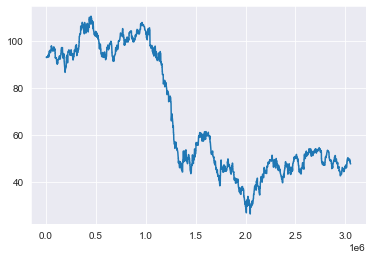

In [30]:
# ploting The oil price values vs date
df_train['oil_price'].plot(kind = "line")

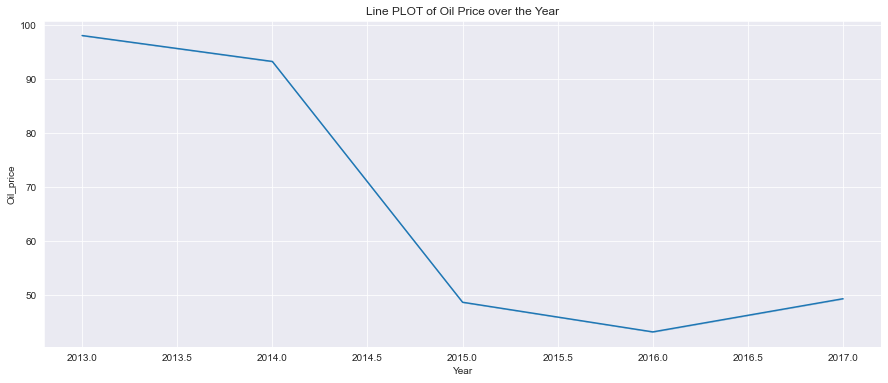

In [31]:
# ploting The oil price line plot w.r.t to year
plt.figure(figsize=(15,6))
sns.lineplot(data= df_train, x ='year',y ='oil_price')
plt.xlabel("Year")
plt.ylabel("Oil_price")
plt.title("Line PLOT of Oil Price over the Year")
plt.show()

**handling Missing values for categorical Data**

Having a dataset with 85% missing values in four columns containing string values, there are several techniques you can consider for filling in those missing values. Here's an approach you can use:

1. Mode Imputation: Since the columns contain string values, one way to fill the missing values is to impute them with the mode, which represents the most frequent value in each respective column. You can calculate the mode for each column and replace the missing values with the mode using pandas.

Mode imputation is a common method for handling missing values in categorical/string data, as it replaces missing values with the most frequent value. However, depending on the specific characteristics of your dataset, other techniques such as using a separate "missing" category or using advanced machine learning algorithms may also be considered. It's important to assess the impact of the imputation method on subsequent analyses and evaluate the validity of the imputed values.

**handling Missing values for categorical Data**


In [32]:
columns_missing = ['holiday_type', 'locale', 'locale_name', 'description', 'transferred']

In [34]:
for column in columns_missing:
    mode_value = df_train[column].mode().iloc[0]
    df_train[column].fillna(mode_value, inplace=True)

In [35]:
# Checking null values in percentage
df_train.isnull().mean() *100

date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
holiday_type    0.000000
locale          0.000000
locale_name     0.000000
description     0.000000
transferred     0.000000
oil_price       0.058343
city            0.000000
state           0.000000
store_type      0.000000
cluster         0.000000
transactions    0.000000
year            0.000000
month           0.000000
week            0.000000
quarter         0.000000
day_of_week     0.000000
dtype: float64

**Observation**
* There is no Null values is present

# EDA

In [36]:
df_train.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,oil_price,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,1697.071441,2013,1,1,1,Tuesday


**1. Date Vs Sales** 

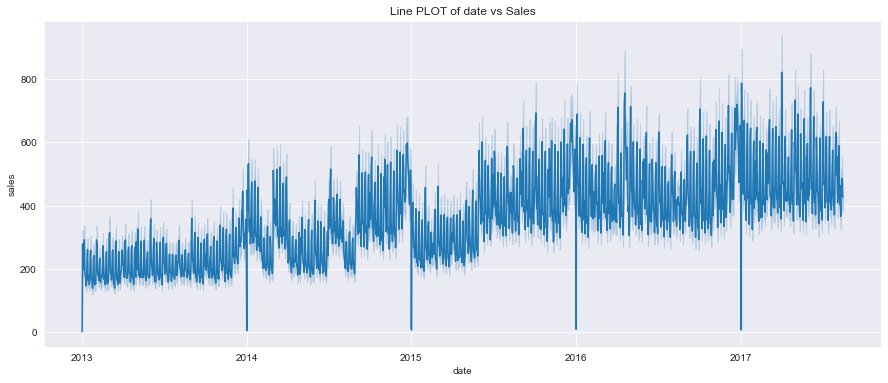

In [37]:
# ploting The data vs sales  line plot w.r.t to year
plt.figure(figsize=(15,6))
sns.lineplot(data= df_train, x ='date',y ='sales')
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Line PLOT of date vs Sales")
plt.show()

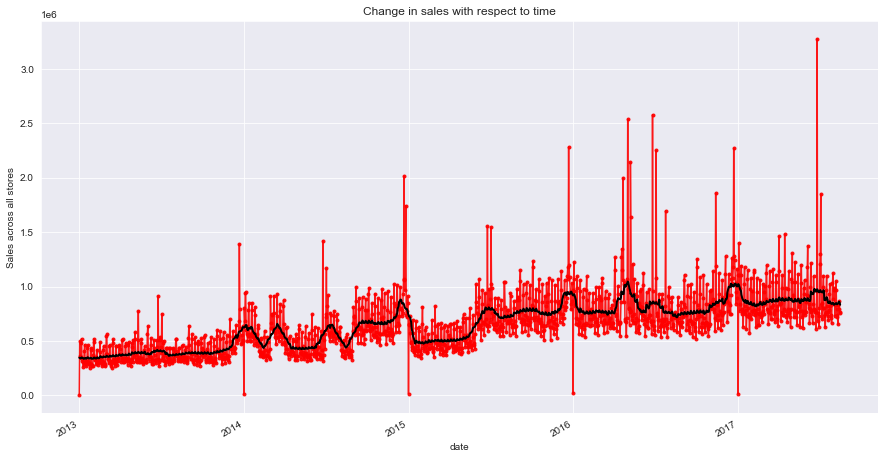

In [112]:
df_train.groupby('date')['sales'].sum().\
                plot(y="sales", marker=".", alpha=0.9, color='red', 
                figsize = (10,10));
df_train.groupby('date')['sales'].sum().\# 30 day simple moving average line
        rolling(window=30, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="k", figsize = (15,8));
plt.ylabel('Sales across all stores')
plt.xlabel('date')
plt.title('Change in sales with respect to time')
plt.show()

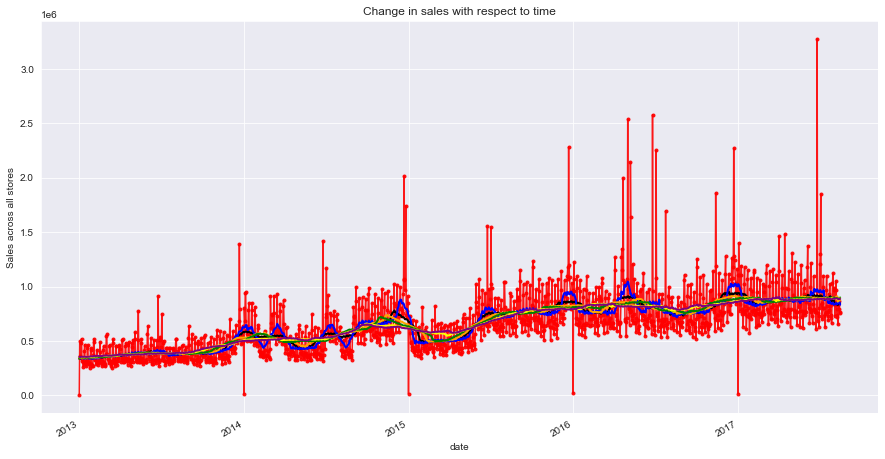

In [116]:
df_train.groupby('date')['sales'].sum().\
                plot(y="sales", marker=".", alpha=0.9, color='red', 
                figsize = (10,10));
# 60 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=60, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="k", figsize = (15,8));
# 30 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=30, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="blue", figsize = (15,8));
# 90 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=90, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="orange", figsize = (15,8));
# 120 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=120, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="green", figsize = (15,8));
# 180 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=180, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="yellow", figsize = (15,8));
# 200 day simple moving average line
df_train.groupby('date')['sales'].sum().\
        rolling(window=200, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="purple", figsize = (15,8));
plt.ylabel('Sales across all stores')
plt.xlabel('date')
plt.title('Change in sales with respect to time')
plt.show()

**Observartion**
* Year on Year there is sales growth

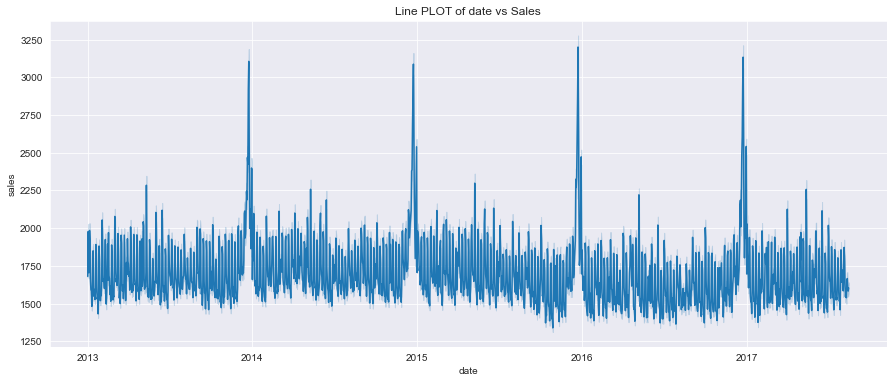

In [38]:
# ploting The data vs sales  line plot w.r.t to year
plt.figure(figsize=(15,6))
sns.lineplot(data= df_train, x ='date',y ='transactions')
plt.xlabel("date")
plt.ylabel("sales")
plt.title("Line PLOT of date vs Sales")
plt.show()

**Sales vs Stores Tyes**

1. Does the type of stores affect the store sales?

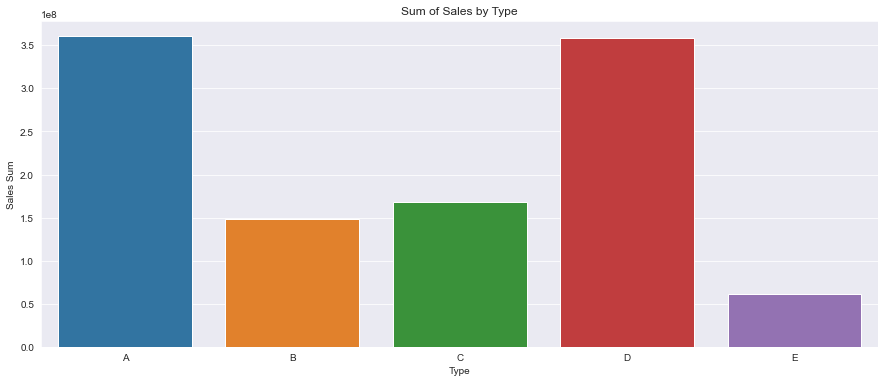

In [42]:
plt.figure(figsize =(15,6))
sales_sum_by_type = df_train.groupby('store_type')['sales'].sum()
sns.barplot(sales_sum_by_type.index, sales_sum_by_type.values)
plt.xlabel('Type')
plt.ylabel('Sales Sum')
plt.title('Sum of Sales by Type')
plt.show()

**Observation**
1. A and D store has similar sales which is amoung all types of store
2. E store type has least sales 


<Figure size 1080x432 with 0 Axes>

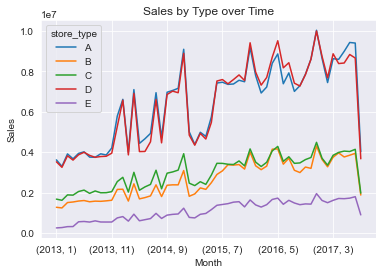

In [48]:
plt.figure(figsize=(15,6))
#group by month and year
monthly_sales_by_type = df_train.groupby(['year','month', 'store_type'])['sales'].sum()

# Unstack 'type' to have types as columns
pivot_df = monthly_sales_by_type.unstack(level='store_type')

# Plot the time series for each type

pivot_df.plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Type over Time')

# Display the plot
plt.show()


**Observation**

1. A and D store has same sales which is higest sales amoung all types of store
2. E store type has least sales
3. B and C has medium sales and similar sales growth

**2. Which family is having the highest sales?**

In [66]:
# group the data by product family and sum up the sales
sales_by_product = df_train.groupby("family")["sales"].sum().sort_values(ascending=False)


# sort the table in decreasing order by sales
print("The total sales of the product is:", sales_by_product)
# get the name of the product with the most sales
most_sold_product = sales_by_product.index[0]

print("The product with the most sales is:", most_sold_product)

The total sales of the product is: family
GROCERY I                    350827297.990000
BEVERAGES                    221663540.000000
PRODUCE                      125447968.024970
CLEANING                      99421019.000000
DAIRY                         65823605.000000
BREAD/BAKERY                  42959924.004929
POULTRY                       32494450.888829
MEATS                         31650996.286063
PERSONAL CARE                 25100482.000000
DELI                          24585626.804737
HOME CARE                     16409522.000000
EGGS                          15881196.000000
FROZEN FOODS                  14646939.998969
PREPARED FOODS                 8966728.108912
LIQUOR,WINE,BEER               7937172.000000
SEAFOOD                        2051636.098841
GROCERY II                     2004966.000000
HOME AND KITCHEN I             1905076.000000
HOME AND KITCHEN II            1556511.000000
CELEBRATION                     779502.000000
LADIESWEAR                      668542

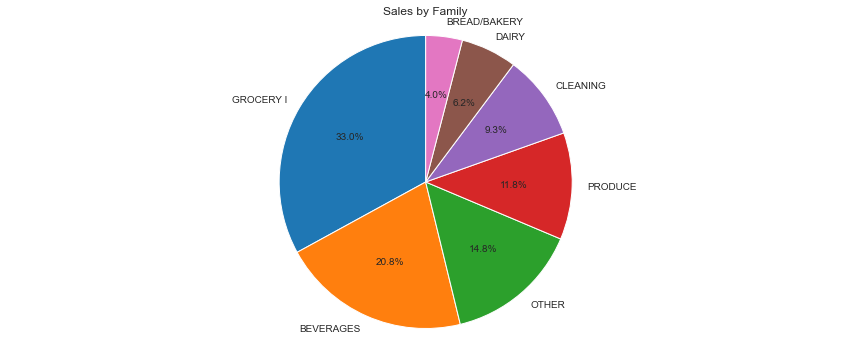

In [50]:
#Pie chart
plt.figure(figsize=(15,6))
# Group the data by family and calculate the total sales for each family
family_sales = df_train.groupby('family')['sales'].sum().sort_values(ascending=False)
family_sales['OTHER'] = family_sales.iloc[7:].sum()
family_sales = family_sales.sort_values(ascending = False).head(7)

# Create the pie chart
plt.pie(family_sales, labels=family_sales.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales by Family')

plt.axis('equal')  
plt.show()

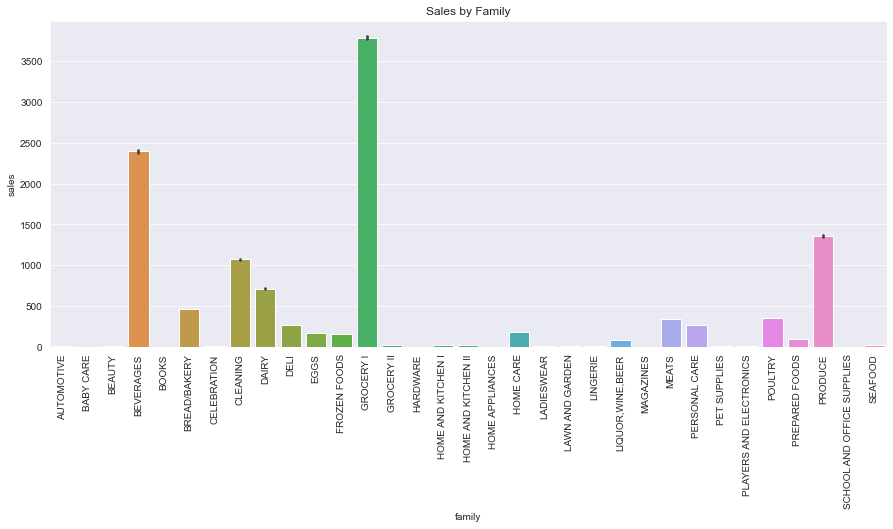

In [56]:
#barplot
plt.figure(figsize=(15,6))
# Group the data by family and calculate the total sales for each family

# Create the pie chart
sns.barplot(data = df_train, x ='family',y ='sales')

plt.title('Sales by Family')
plt.xticks(rotation =90)
plt.show()

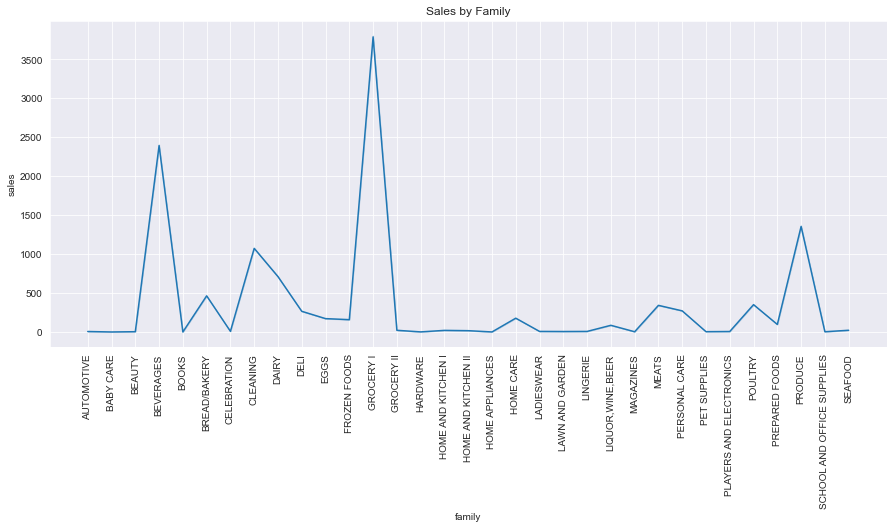

In [58]:
#line
plt.figure(figsize=(15,6))
# Group the data by family and calculate the total sales for each family

# Create the pie chart
sns.lineplot(data = df_train, x ='family',y ='sales')

plt.title('Sales by Family')
plt.xticks(rotation =90)
plt.show()

**Observation**
1. The Grocery I is having the highest sales which is around 33%
2. Baverages comes second highest which is around 28% 
3. Sales of bread/bakery, Dairy, Cleaning, produce family Contributes around 31% sales
4. Other than family contributes 28% sales 

**Store_nbr vs Sales**

In [63]:
# group the data by store_nbr and sum up the sales
pd.set_option('float_format', '{:f}'.format)
sales_by_store = df_train.groupby("store_nbr")["sales"].sum().sort_values(ascending=False)

# create a new DataFrame from the result
sales_table = pd.DataFrame({
    "store_nbr": sales_by_store.index,
    "total_sales": sales_by_store.values
})
print("The top 5 stores sales")
sales_table.head()

The top 5 stores sales


,store_nbr,total_sales
0,44,63356137.229999
1,45,55689022.002460
2,47,52024475.956001
3,3,51533528.135851
4,49,44346822.760066


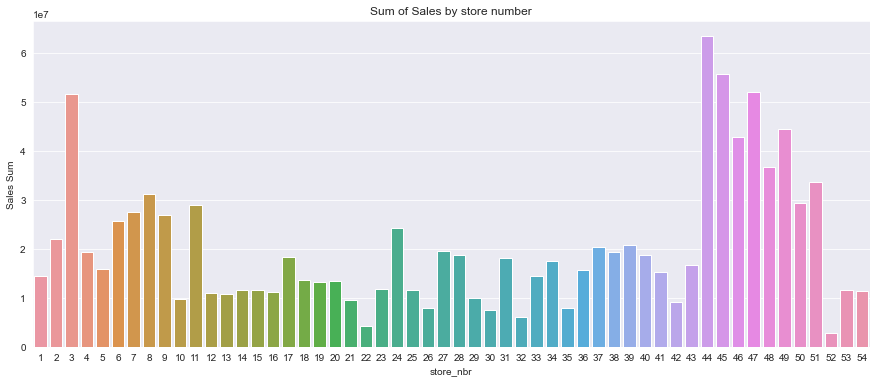

In [64]:
# ploting sales graphs vs Store number
plt.figure(figsize =(15,6))
sns.barplot(sales_table['store_nbr'], sales_table['total_sales'])
plt.xlabel('store_nbr')
plt.ylabel('Sales Sum')
plt.title('Sum of Sales by store number')
plt.show()

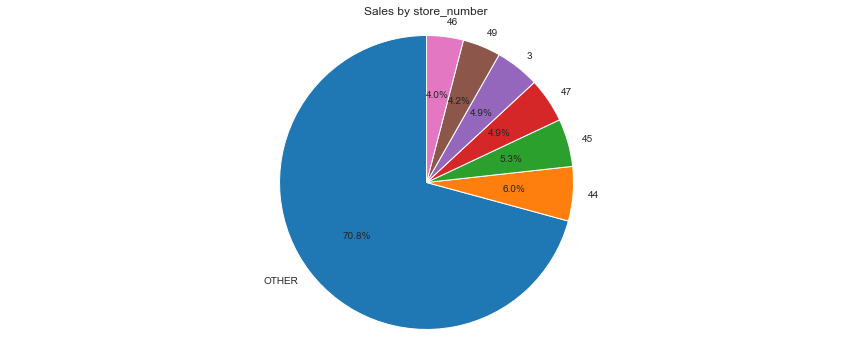

In [65]:
#Pie chart
plt.figure(figsize=(15,6))
# Group the data by family and calculate the total sales for each family
family_sales = df_train.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)
family_sales['OTHER'] = family_sales.iloc[7:].sum()
family_sales = family_sales.sort_values(ascending = False).head(7)

# Create the pie chart
plt.pie(family_sales, labels=family_sales.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales by store_number')

plt.axis('equal')  
plt.show()

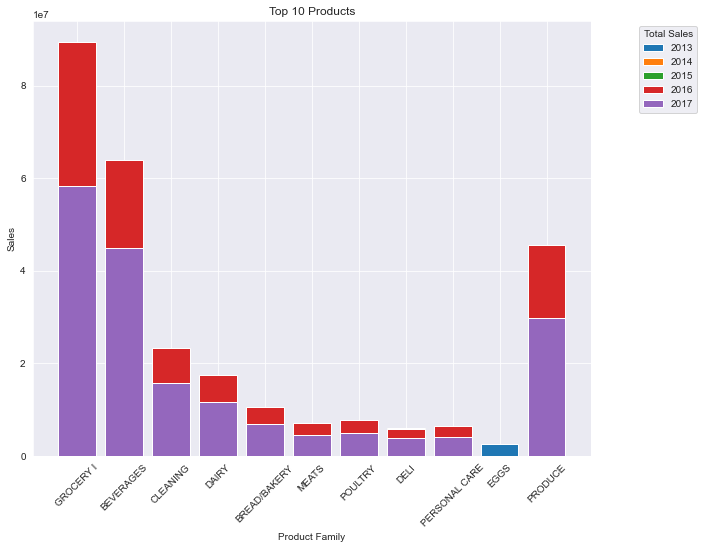

In [67]:
# group the data by year and product family and sum up the sales
sales_by_year_and_product = df_train.groupby(["year", "family"])["sales"].sum().reset_index()

# sort the data by year and sales in descending order
sales_by_year_and_product = sales_by_year_and_product.sort_values(by=["year", "sales"], ascending=[True, False])
fig, ax = plt.subplots(figsize=(10, 8))

# loop over the years and plot the top 10 products for each year
for year in sales_by_year_and_product["year"].unique():
    top_products = sales_by_year_and_product[sales_by_year_and_product["year"] == year].head(10)
    ax.bar(top_products["family"], top_products["sales"], label=str(year))

# set the axis labels and legend
ax.set_xlabel("Product Family")
ax.set_ylabel("Sales")
ax.legend(title="Total Sales", loc="upper right", bbox_to_anchor=(1.2, 1))

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# set the title and show the plot
ax.set_title("Top 10 Products")
plt.show()

**Product sales in 2015**

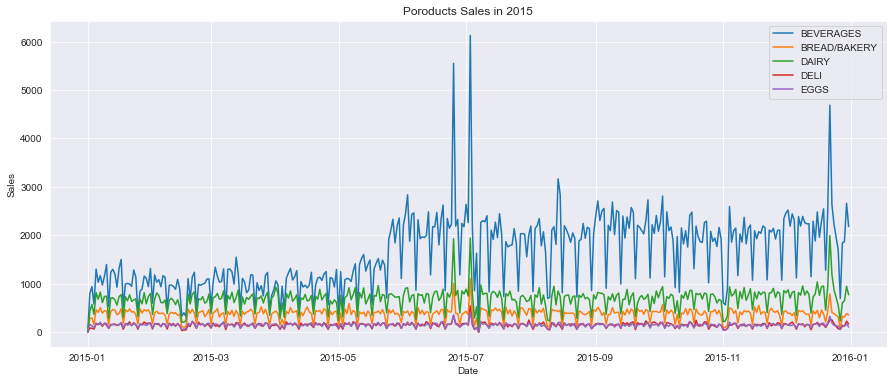

In [70]:
start_date = '2015-01-01'
end_date = '2015-12-31'
plt.figure(figsize=(15,6))
store_sales = df_train[(df_train['store_nbr'] == 1) & 
                       (df_train['date'].between(start_date, end_date))]
store_sales = store_sales[['date','sales','family']]
#store_sales['date'] = store_sales.date.dt.to_period('D')

daily_sales = store_sales.groupby(['date','family'], as_index=False).sum()
cols = ['BEVERAGES','BREAD/BAKERY','DAIRY','DELI','EGGS']
for i in cols:
    fam_sales = daily_sales[daily_sales['family'] == i]
    fam_sales = fam_sales[['date','sales']]
    fam_sales = fam_sales.set_index('date')
    plt.plot(fam_sales.index, fam_sales['sales'], label=i)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Poroducts Sales in 2015')
plt.legend()
plt.show()


**Product sales in 2016**

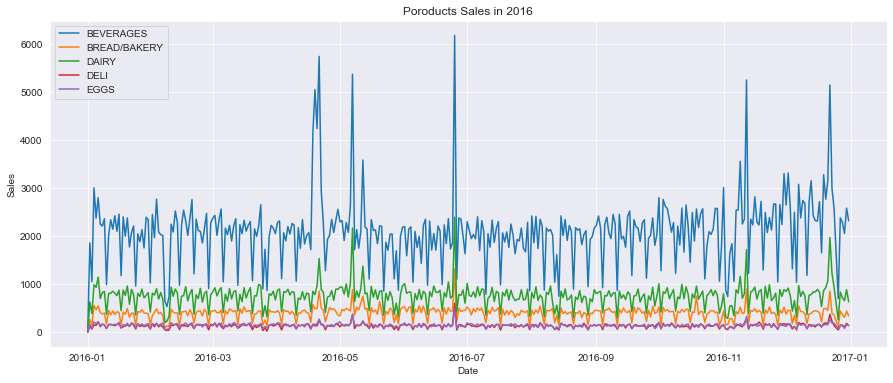

In [72]:
start_date = '2016-01-01'
end_date = '2016-12-31'
plt.figure(figsize=(15,6))
store_sales = df_train[(df_train['store_nbr'] == 1) & 
                       (df_train['date'].between(start_date, end_date))]
store_sales = store_sales[['date','sales','family']]
#store_sales['date'] = store_sales.date.dt.to_period('D')

daily_sales = store_sales.groupby(['date','family'], as_index=False).sum()
cols = ['BEVERAGES','BREAD/BAKERY','DAIRY','DELI','EGGS']
for i in cols:
    fam_sales = daily_sales[daily_sales['family'] == i]
    fam_sales = fam_sales[['date','sales']]
    fam_sales = fam_sales.set_index('date')
    plt.plot(fam_sales.index, fam_sales['sales'], label=i)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Poroducts Sales in 2016')
plt.legend()
plt.show()


**Product sold in 2017**

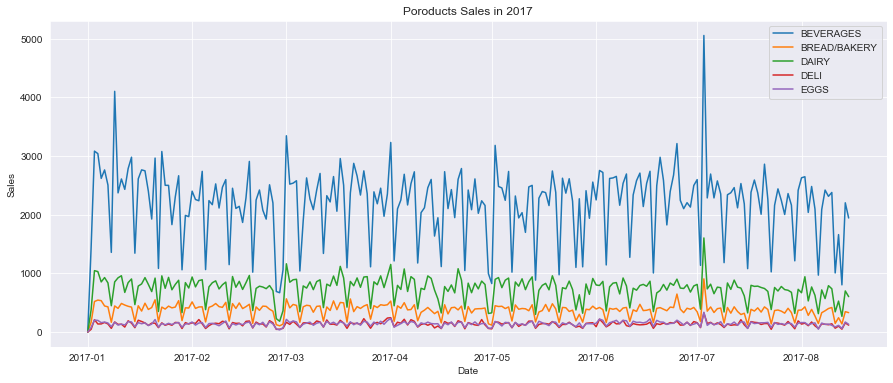

In [74]:
start_date = '2017-01-01'
end_date = '2017-12-31'
plt.figure(figsize=(15,6))
store_sales = df_train[(df_train['store_nbr'] == 1) & 
                       (df_train['date'].between(start_date, end_date))]
store_sales = store_sales[['date','sales','family']]
#store_sales['date'] = store_sales.date.dt.to_period('D')

daily_sales = store_sales.groupby(['date','family'], as_index=False).sum()
cols = ['BEVERAGES','BREAD/BAKERY','DAIRY','DELI','EGGS']
for i in cols:
    fam_sales = daily_sales[daily_sales['family'] == i]
    fam_sales = fam_sales[['date','sales']]
    fam_sales = fam_sales.set_index('date')
    plt.plot(fam_sales.index, fam_sales['sales'], label=i)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Poroducts Sales in 2017')
plt.legend()
plt.show()


**Observation**
1. Every year between 2015 to 2017 Brevages product has highest sales 
2. least sales of Eggs and Deli product in between 2015 to 2017
3. sales of Dariy and bread/bakery product is similar to each other and flowing same pattern

# SEASONAL PLOT

In [83]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        #errorbar=('ci', False),
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


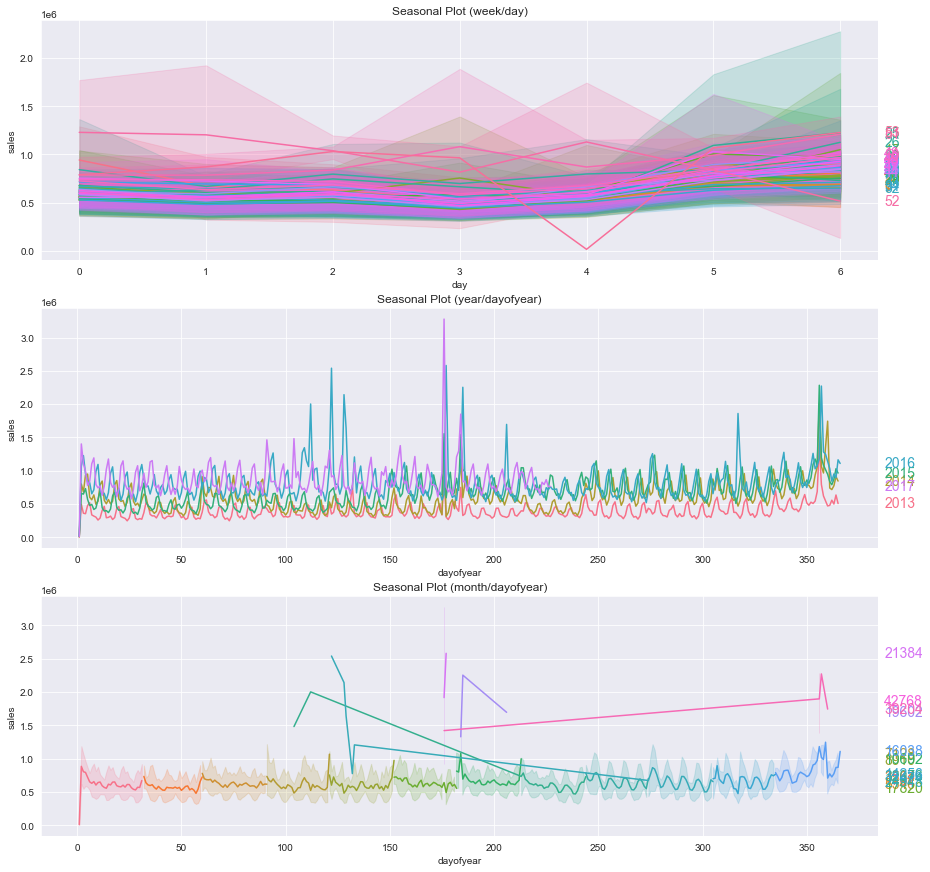

In [85]:

cols = ['store_nbr','family','onpromotion'] 
#cols = ['date','sales'] 
store_sales = df_train.copy()
store_sales = store_sales.drop(columns=cols)
store_sales['date'] = store_sales.date.dt.to_period('D')

day_sales = store_sales.groupby(['date']).sum()

X = day_sales.copy()

# days within a week
X["day"] = X.index.dayofweek 
X["week"] = X.index.week  

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, axes = plt.subplots(nrows=3,figsize=(15, 15))
seasonal_plot(X, y="sales", period="week", freq="day", ax=axes[0])
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=axes[1]);
seasonal_plot(X, y="sales", period="month", freq="dayofyear", ax=axes[2]);


**Sales Vs State and City**

In [91]:
sales_by_state = df_train.groupby("state")["sales"].sum().sort_values(ascending=False)

# create a new DataFrame from the result
sales_table = pd.DataFrame({
    "state": sales_by_state.index,
    "total_sales": sales_by_state.values
})
print("The top 5 stores sales")
sales_table.head()

The top 5 stores sales


,state,total_sales
0,Pichincha,597585883.410062
1,Guayas,168649985.235641
2,Azuay,50194045.798877
3,Tungurahua,41159772.876615
4,Santo Domingo de los Tsachilas,36617571.509397


Text(0.5, 1.0, 'The highest Sales by Family of top 10')

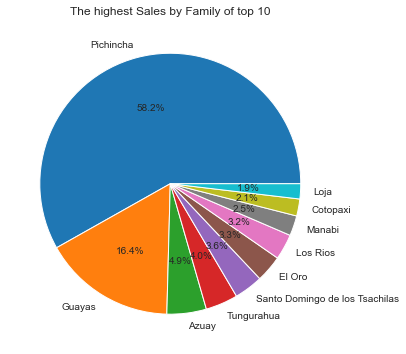

In [90]:
plt.figure(figsize=(15,6))
family_sales_group = df_train.groupby(by=['state'])['sales'].sum()
family_sales_group = family_sales_group.sort_values(ascending=False)
plt.pie(family_sales_group[:10], labels=family_sales_group[:10].index, autopct='%1.1f%%')
plt.title('The highest Sales by Family of top 10')

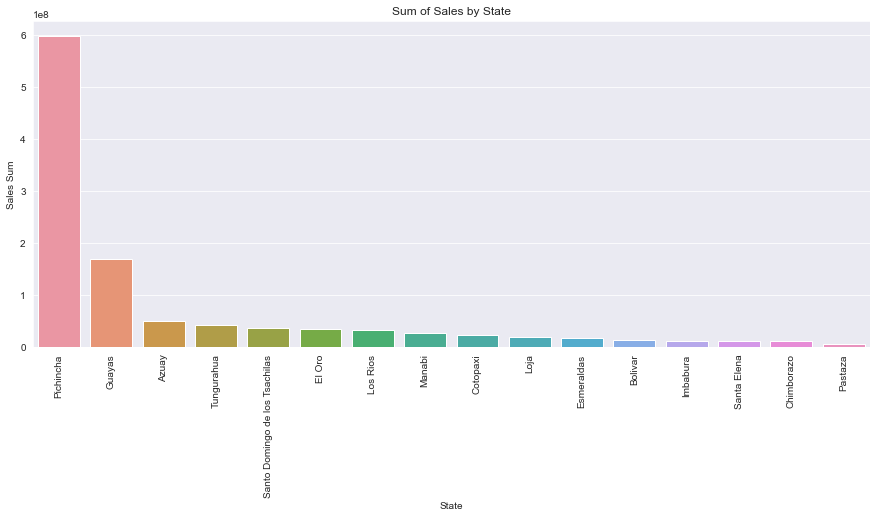

In [93]:
# bargraph
# ploting sales graphs vs Store number
plt.figure(figsize =(15,6))
sns.barplot(sales_table['state'], sales_table['total_sales'])
plt.xlabel('State')
plt.ylabel('Sales Sum')
plt.xticks(rotation =90)
plt.title('Sum of Sales by State')
plt.show()

In [96]:
sales_by_city= df_train.groupby("city")["sales"].sum().sort_values(ascending=False)

# create a new DataFrame from the result
sales_table = pd.DataFrame({
    "city": sales_by_city.index,
    "total_sales": sales_by_city.values
})
print("The top 5 stores sales")
sales_table.head()

The top 5 stores sales


,city,total_sales
0,Quito,568679349.490766
1,Guayaquil,125572185.606137
2,Cuenca,50194045.798877
3,Ambato,41159772.876615
4,Santo Domingo,36617571.509397


Text(0.5, 1.0, 'The highest Sales by Family of top 10')

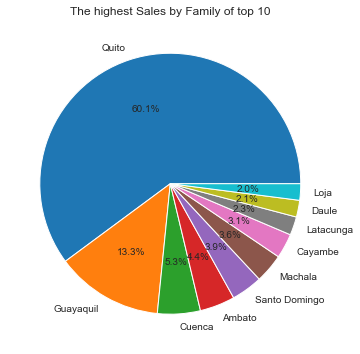

In [97]:
plt.figure(figsize=(15,6))
family_sales_group = df_train.groupby(by=['city'])['sales'].sum()
family_sales_group = family_sales_group.sort_values(ascending=False)
plt.pie(family_sales_group[:10], labels=family_sales_group[:10].index, autopct='%1.1f%%')
plt.title('The highest Sales by Family of top 10')

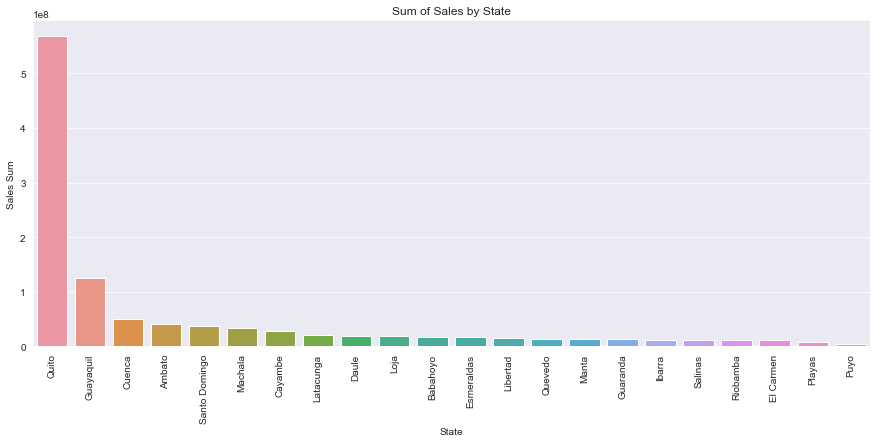

In [98]:
# bargraph
# ploting sales graphs vs Store number
plt.figure(figsize =(15,6))
sns.barplot(sales_table['city'], sales_table['total_sales'])
plt.xlabel('State')
plt.ylabel('Sales Sum')
plt.xticks(rotation =90)
plt.title('Sum of Sales by State')
plt.show()

**Which store in Quito city has the highest sales volume**

Text(0.5, 1.0, 'The Highest Sales in the Quito City')

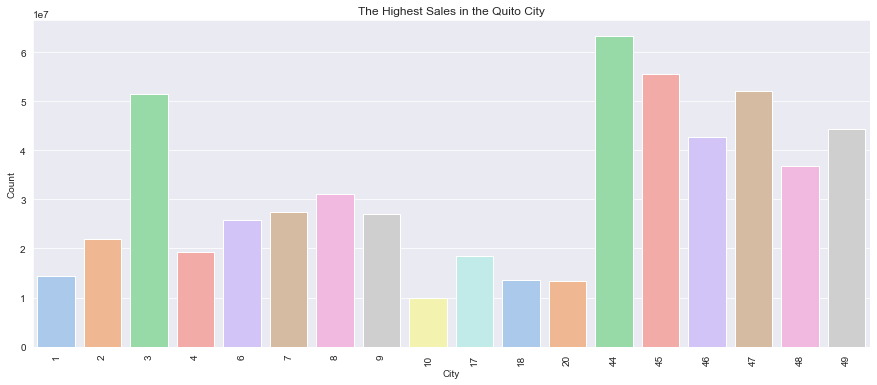

In [101]:
 #Which store in Quito city has the highest sales volume
plt.figure(figsize=(15,6))
quito_store_df = df_train[df_train['city'] == 'Quito']
quito_store_group = quito_store_df.groupby(by=['store_nbr'])['sales'].sum().reset_index()
ax = sns.barplot(data = quito_store_group, x='store_nbr', y= 'sales', palette=sns.color_palette('pastel'))
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('The Highest Sales in the Quito City')

**Which store in Pichincha state has the highest sales volume**

Text(0.5, 1.0, 'The Highest Sales in the Pichincha state')

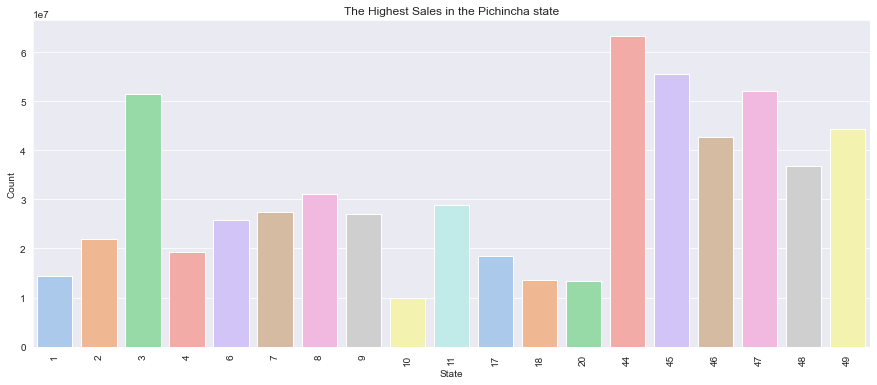

In [104]:
plt.figure(figsize=(15,6))
quito_store_df = df_train[df_train['state'] == 'Pichincha']
quito_store_group = quito_store_df.groupby(by=['store_nbr'])['sales'].sum().reset_index()
ax = sns.barplot(data = quito_store_group, x='store_nbr', y= 'sales', palette=sns.color_palette('pastel'))
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('The Highest Sales in the Pichincha state')

**Which store has the highest number of promotional products**

Text(0.5, 1.0, 'Sum of On Promotion Distribution for Each store')

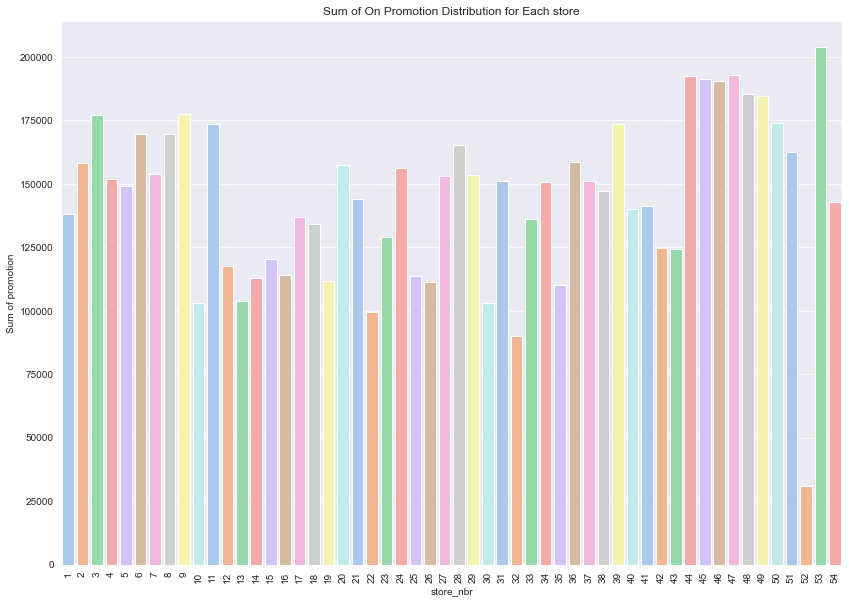

In [106]:
#Which store has the highest number of promotional products
plt.figure(figsize=(14, 10))
onpromotion_sum_group = train_df.groupby(by=['store_nbr'])['onpromotion'].sum().reset_index()
ax = sns.barplot(data = onpromotion_sum_group, x='store_nbr', y='onpromotion', palette=sns.color_palette('pastel'))
ax.set_xlabel('store_nbr')
ax.set_ylabel('Sum of promotion')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Sum of On Promotion Distribution for Each store')

**The relationship between the quantity of promotional products and sales revenue**

Text(0.5, 1.0, 'Relationship of Promotion and Sales')

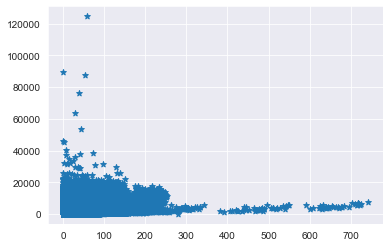

In [107]:
#The relationship between the quantity of promotional products and sales revenue
plt.scatter(train_df['onpromotion'], train_df['sales'], marker='*')
ax.set_xlabel('On Promotion')
ax.set_ylabel('Sales')
ax.set_title('Relationship of Promotion and Sales')

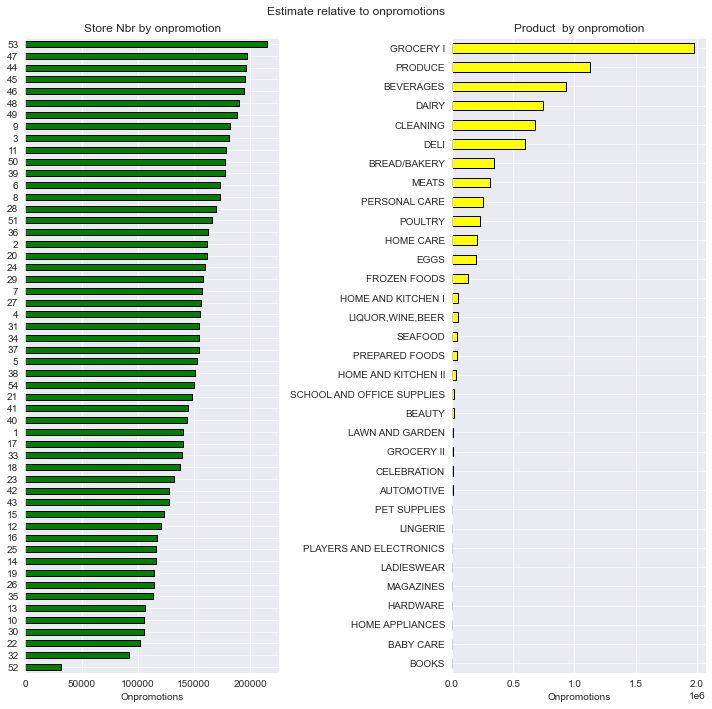

In [110]:
plt.subplot(1,2,1)
df_train.groupby('store_nbr')['onpromotion'].sum().sort_values().plot(kind='barh', 
                         figsize=(10,10), edgecolor="k", color='green')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Onpromotions')
plt.title('Store Nbr by onpromotion')

plt.subplot(1,2,2)
df_train.groupby('family')['onpromotion'].sum().sort_values().plot(kind='barh', 
                                figsize=(10,10), edgecolor="k", color='yellow')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Onpromotions')
plt.title('Product  by onpromotion')

plt.suptitle('Estimate relative to onpromotions')
plt.tight_layout()
plt.show()

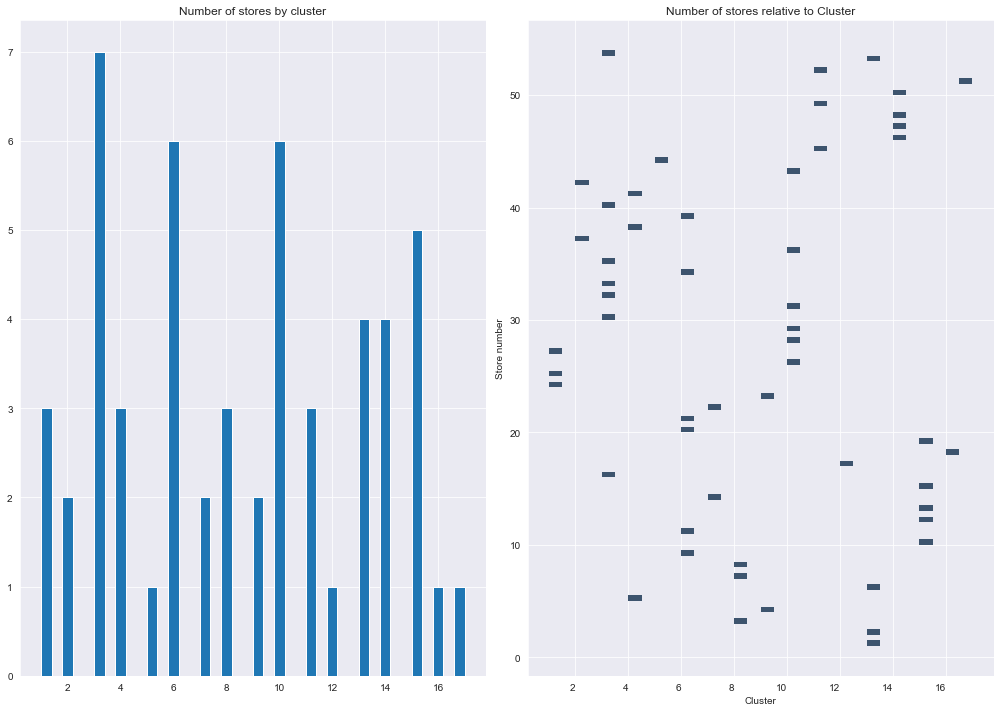

In [120]:
plt.figure(figsize=(14, 10))
plt.subplot(1,2,1)
plt.hist(x='cluster', data=store_df, bins=40)
plt.title('Number of stores by cluster')

plt.subplot(1,2,2)
sns.histplot(x='cluster',y='store_nbr',data=store_df, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('Cluster')
plt.xticks(horizontalalignment="right")
plt.title('Number of stores relative to Cluster')

plt.tight_layout()
plt.show()

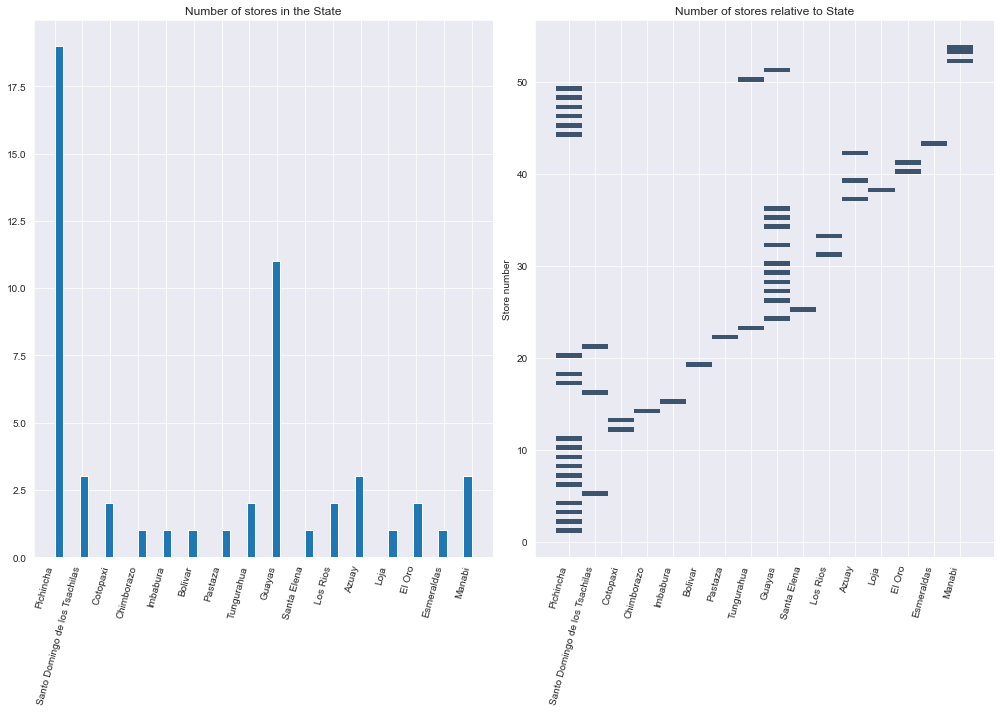

In [122]:
plt.figure(figsize=(14, 10))
plt.subplot(1,2,1)
plt.hist(x='state', data=store_df, bins=50);
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores in the State')

plt.subplot(1,2,2)
sns.histplot(x='state',y='store_nbr',data=store_df, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('')
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores relative to State')

plt.tight_layout()
plt.show()


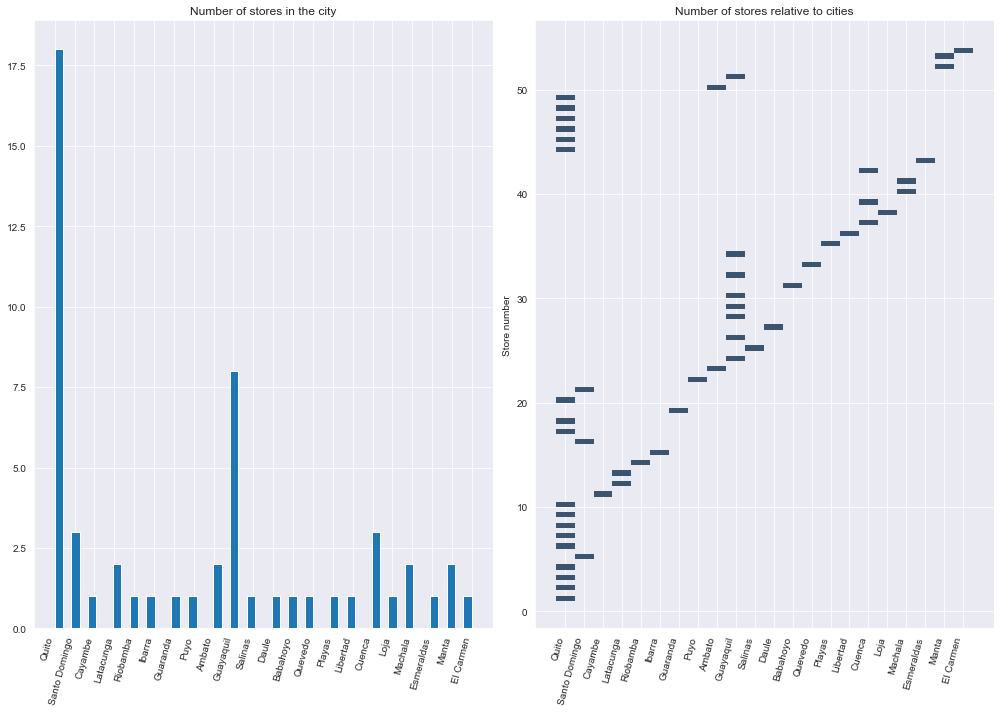

In [124]:
plt.figure(figsize=(14, 10))
plt.subplot(1,2,1)
plt.hist(x='city', data=store_df, bins=50);
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores in the city')

plt.subplot(1,2,2)
sns.histplot(x='city',y='store_nbr',data=store_df, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('')
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores relative to cities')

plt.tight_layout()
plt.show()


In [128]:
num_cols = df_train.select_dtypes(include =['float','int']).columns
cat_cols = df_train.select_dtypes(include =['object']).columns

In [136]:
(num_cols)

Index(['store_nbr', 'sales', 'onpromotion', 'oil_price', 'cluster',
       'transactions', 'year', 'month', 'quarter'],
      dtype='object')

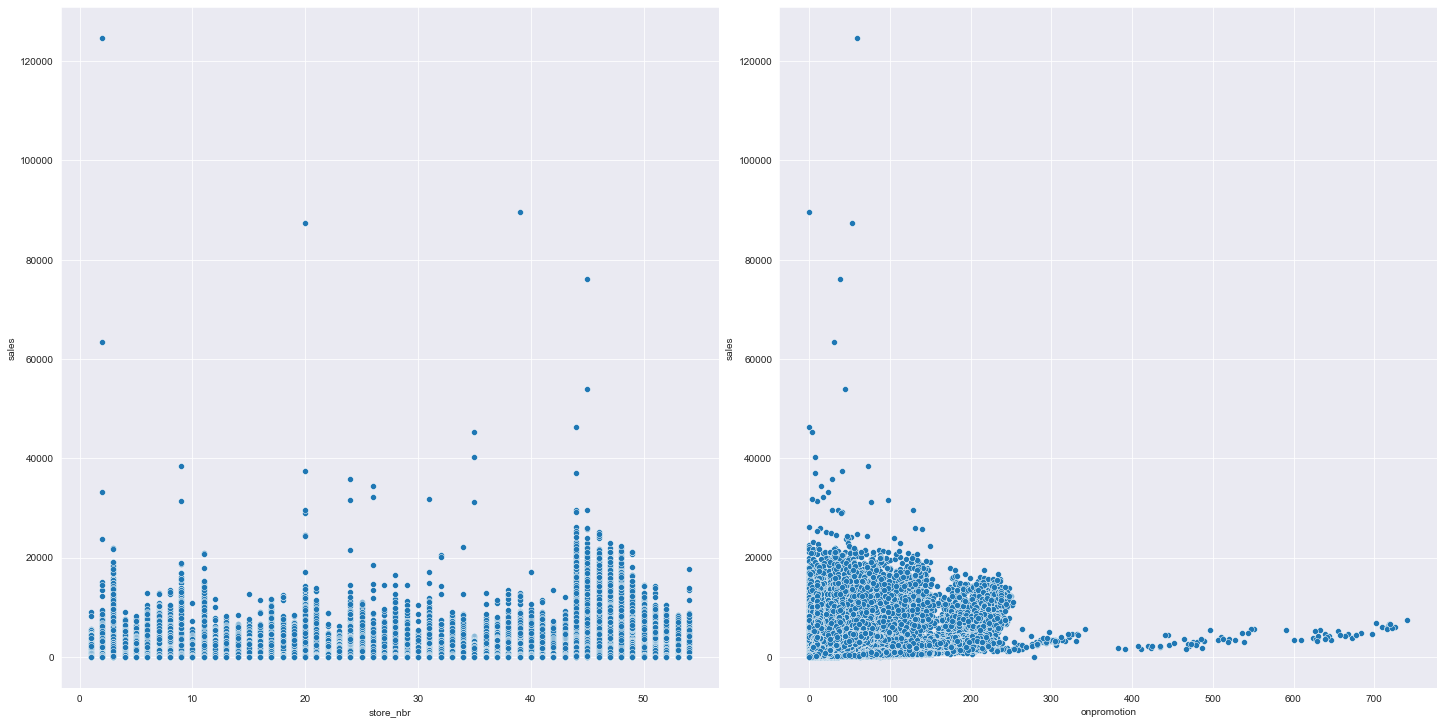

In [141]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()
column = ['store_nbr', 'sales', 'onpromotion', ]
for col in column:
    if col != 'sales' :
        sns.scatterplot(x=col,y ='sales' ,data=train_df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


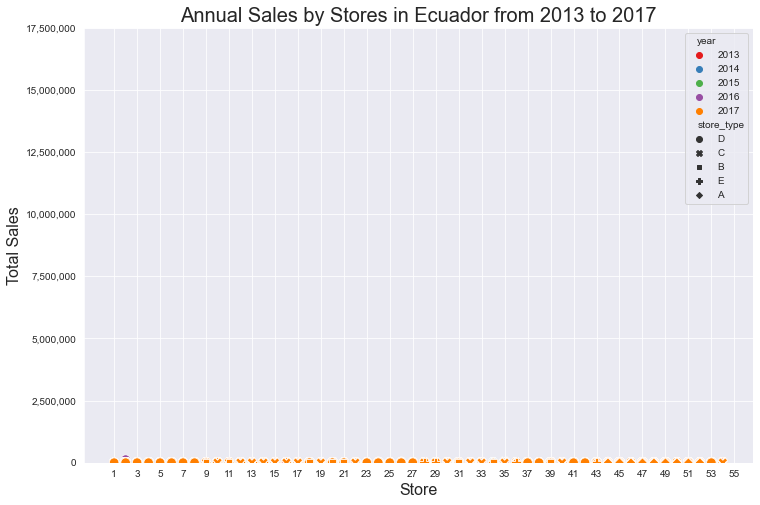

In [151]:
# PLot the sales & store_type

plt.figure(figsize=(12,8))
sns.scatterplot(data = train_df,x= train_df['store_nbr'], y = train_df['sales'], hue =df_train['year'],
                s = 90, palette = 'Set1', style = df_train['store_type'])

plt.xlabel('Store', fontsize = 16)
plt.ylabel('Total Sales', fontsize = 16)
plt.title('Annual Sales by Stores in Ecuador from 2013 to 2017', fontsize = 20)

plt.xticks(range(1,56,2))
plt.yticks([0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], 
           ['0', '2,500,000', '5,000,000', '7,500,000', '10,000,000', '12,500,000', '15,000,000', '17,500,000'])
plt.show()